In [1]:
%load_ext autoreload
%autoreload 2

ic| str_path: ('D:\\Profile data Cardiff\\Cardiff University\\Energy Data - '
               'Documents\\General\\resources\\Equipment_gain_profile_TM59.xlsx')
    sheet_name: 'Normalised'
ic| sum_profile: 1.0


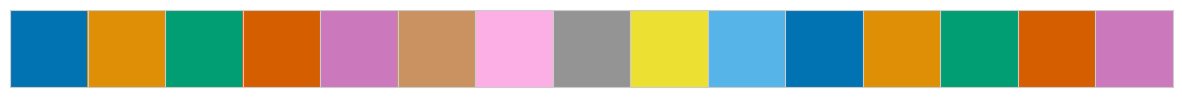

In [2]:
import sys
sys.path.insert(0, '..//src/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import main
from common import enums, functions, schema
import geopandas as gpd
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from common import viz_functions

sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "pdf"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'
sns.palplot(sns.color_palette())

## PV gis data UKPN network

In [3]:
PATH_ORG = main.PATH_ORG
ukpn_pvgis_data_path = PATH_ORG / r'General\data\Electricity substation data\ukpn\pv data\pv_gis'


def process_pv_gis_data(dataf: pd.DataFrame) -> pd.DataFrame:
  dataf = dataf.iloc[:8760].copy()
  dataf['P'] = dataf['P'].astype(float)
  dataf['time'] = pd.to_datetime(dataf['time'], format="%Y%m%d:%H%M")
  dataf = dataf.set_index('time')
  dataf = dataf.resample('1h').mean()
  return dataf


power_output_data = []

for file_path in ukpn_pvgis_data_path.rglob("*.csv"):
  print(file_path.stem)
  slope = int(file_path.stem.split("deg", 2)[1].rsplit("_", 1)[-1])
  print(slope)
  dataf = pd.read_csv(file_path, skiprows=[0, 6], header=6)
  dataf = process_pv_gis_data(dataf)
  new_name_col = f'P_{slope}_(W)'
  dataf = dataf.rename(columns={'P': new_name_col})
  power_output_data.append(dataf[new_name_col])

pv_outputs_df = pd.concat(power_output_data, axis=1)
pv_outputs_df['P_mean'] = pv_outputs_df.mean(axis=1)
pv_outputs_df.to_csv(ukpn_pvgis_data_path.parent/"summarised_pvgis_data.csv")
pv_outputs_df.head()

Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_-45deg_2019_2019
-45
Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_0deg_2019_2019
0
Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_45deg_2019_2019
45


,P_-45_(W),P_0_(W),P_45_(W),P_mean
time,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0


Text(0.5, 0, '')

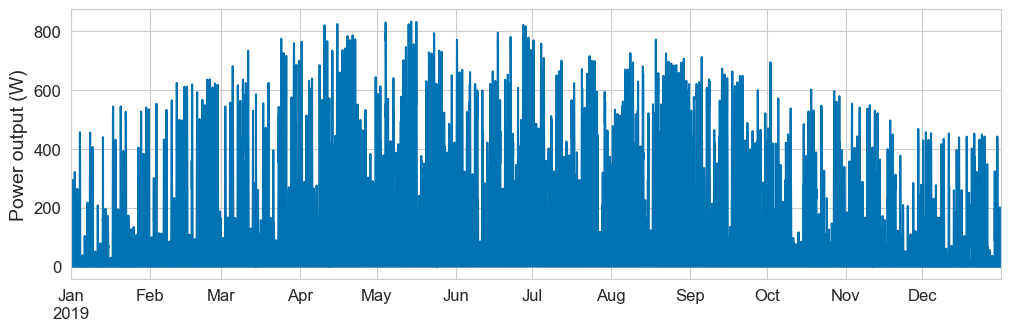

In [4]:
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df['P_mean'].plot(ax=ax)
ax.set_ylabel('Power output (W)')
ax.set_xlabel('')

Text(0.5, 0, '')

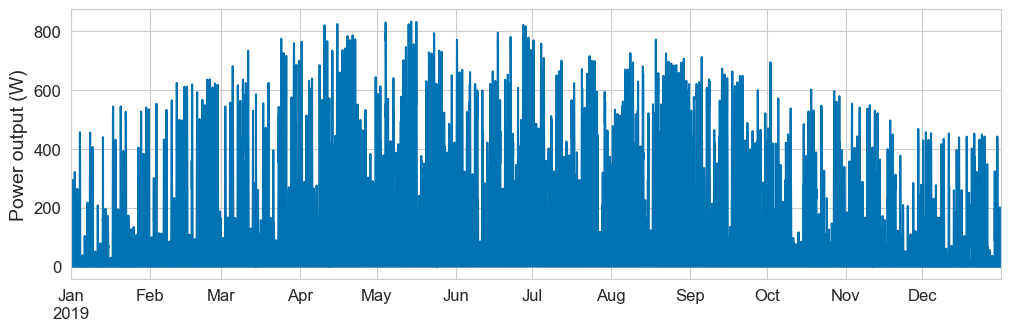

In [5]:
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df['P_mean'].plot(ax=ax)
# pv_outputs_df['P_mean'].resample('1m').mean().plot(ax=ax)
ax.set_ylabel('Power output (W)')
ax.set_xlabel('')

In [6]:
pv_outputs_df['P_mean'].sum()/1000

1024.5083333333334

In [7]:
## UKPN DFES DATA AT LSOA LEVEL FOR 2050

In [9]:
ukpn_dfes_path = PATH_ORG / r'General\data\Electricity substation data\ukpn'

fn = "DFES-2022--Leading_the_Way--Domestic-PV-capacity--LSOA.csv"
dfes_dataf = pd.read_csv(ukpn_dfes_path / fn, index_col=0)
dfes_dataf.head()

,LSOAs,2021 (kW),2022 (kW),2023 (kW),2024 (kW),2025 (kW),2026 (kW),2027 (kW),2028 (kW),2029 (kW),...,2041 (kW),2042 (kW),2043 (kW),2044 (kW),2045 (kW),2046 (kW),2047 (kW),2048 (kW),2049 (kW),2050 (kW)
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,0,0,0,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,4,4
E01000002,City of London 001B,22,26,28,31,34,34,34,35,35,...,42,43,44,45,45,46,47,48,48,49
E01000003,City of London 001C,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
E01000005,City of London 001E,3,4,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
E01000006,Barking and Dagenham 016A,12,14,15,17,18,20,21,23,25,...,57,60,64,68,71,75,79,82,85,87


In [10]:
list_lsoas = dfes_dataf.index.unique()
len(list_lsoas)

10639

In [11]:
## Extract cooling demand of LSOAs in ukpn

In [12]:
residential_data = main.import_thermal_characteristics_data(
    main.PATH_GB_DATA / 'Thermal_characteristics_afterEE.csv', 2020, 2050)
filt = residential_data['LSOA_code'].isin(list_lsoas)
residential_data = residential_data[filt]
# residential_data = residential_data.reset_index()
list_la_code = list(residential_data['ladcd'].unique())
filt = residential_data[
    schema.DwellingDataSchema.THERMAL_CAPACITY_LEVEL] == "medium"
residential_data = residential_data.loc[filt].copy()
residential_data.head()

,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,CIBSE_city,ladcd,ladnm
Index,,,,,,,,,,,,,,,
471403,E01000001,City of London,London,flat,oil boiler,20699.495206,0.190661,14,8115.289346,82.797981,medium,-2,Birmingham,E09000001,city of london
471404,E01000001,City of London,London,semi-detached,gas boiler,24487.644025,0.262593,2,11176.994057,97.950576,medium,-2,Birmingham,E09000001,city of london
471405,E01000001,City of London,London,terraced,gas boiler,46503.543701,0.467660,1,19905.482816,186.014175,medium,-2,Birmingham,E09000001,city of london
471406,E01000001,City of London,London,terraced,resistance heating,16315.000000,0.062456,11,2658.375704,65.260000,medium,-2,Birmingham,E09000001,city of london
471407,E01000001,City of London,London,flat,gas boiler,14463.409091,0.114664,107,4880.555556,57.853636,medium,-2,Birmingham,E09000001,city of london


In [22]:
import icecream as ic

PATH_RESULTS = PATH_ORG / r'General\04 - Analysis\2050 high emission medium thermal capacity'

# PATH_RESULTS = Path(r'C:/Users/sceac10/OneDrive - Cardiff University/General/04 - Analysis/2050 high emission/simulation/city of london_E09000001/')

try:
  ukpn_lsoa_cooling_demand = pd.read_csv(ukpn_dfes_path /
                                         "ukpn_lsoa_cooling_demand.csv",
                                         index_col=0)
except:
  lsoa_to_index_dict = dict(residential_data.reset_index().groupby('LSOA_code')['Index'].apply(list))
  frames: dict[str, pd.Series] = {}
  pathlist = (Path(PATH_RESULTS) /
              'simulation').rglob('*_total_heating_outputs.csv')
  for temp_path in pathlist:

    la_str = temp_path.stem.split('_total_heating_outputs')[0]
    la_code = la_str.split('_')[-1]
    if la_code in list_la_code:
      ic.ic(temp_path)
      ic.ic(la_code)
      temp_sim_results = pd.read_csv(temp_path, index_col=0, parse_dates=True)
      temp_sim_results.columns = [int(x) for x in temp_sim_results.columns]
      for lsoa_code, list_index in lsoa_to_index_dict.items():
        list_index_in_file = [
            x for x in temp_sim_results.columns if x in list_index
        ]
        if len(list_index_in_file) > 0:
          ic.ic(lsoa_code)
          frames[lsoa_code] = -temp_sim_results[list_index].sum(axis=1)

  ukpn_lsoa_cooling_demand = pd.concat(frames, axis=1)
  ukpn_lsoa_cooling_demand.to_csv(ukpn_dfes_path /
                                  "ukpn_lsoa_cooling_demand.csv")

ic| temp_path: WindowsPath('D:/Profile data Cardiff/Cardiff University/Energy Data - Documents/General/04 - Analysis/2050 high emission medium thermal capacity/simulation/adur_E07000223/adur_E07000223_total_heating_outputs.csv')
ic| la_code: 'E07000223'
ic| lsoa_code: 'E01031338'
ic| lsoa_code: 'E01031339'
ic| lsoa_code: 'E01031340'
ic| lsoa_code: 'E01031341'
ic| lsoa_code: 'E01031342'
ic| lsoa_code: 'E01031343'
ic| lsoa_code: 'E01031344'
ic| lsoa_code: 'E01031345'
ic| lsoa_code: 'E01031346'
ic| lsoa_code: 'E01031347'
ic| lsoa_code: 'E01031348'
ic| lsoa_code: 'E01031349'
ic| lsoa_code: 'E01031350'
ic| lsoa_code: 'E01031351'
ic| lsoa_code: 'E01031352'
ic| lsoa_code: 'E01031353'
ic| lsoa_code: 'E01031354'
ic| lsoa_code: 'E01031355'
ic| lsoa_code: 'E01031356'
ic| lsoa_code: 'E01031357'
ic| lsoa_code: 'E01031358'
ic| lsoa_code: 'E01031359'
ic| lsoa_code: 'E01031360'
ic| lsoa_code: 'E01031361'
ic| lsoa_code: 'E01031362'
ic| lsoa_code: 'E01031363'
ic| lsoa_code: 'E01031364'
ic| lsoa_code: 'E

In [23]:
temp_sim_results.head()

,624350,624351,624352,624353,624354,624355,624356,624357,624358,624359,...,625449,785714,785715,785716,785717,785718,785719,785720,785721,785722
Time_(h),,,,,,,,,,,,,,,,,,,,,
2050-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2050-05-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2050-05-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2050-05-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2050-05-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Time_(h)'>

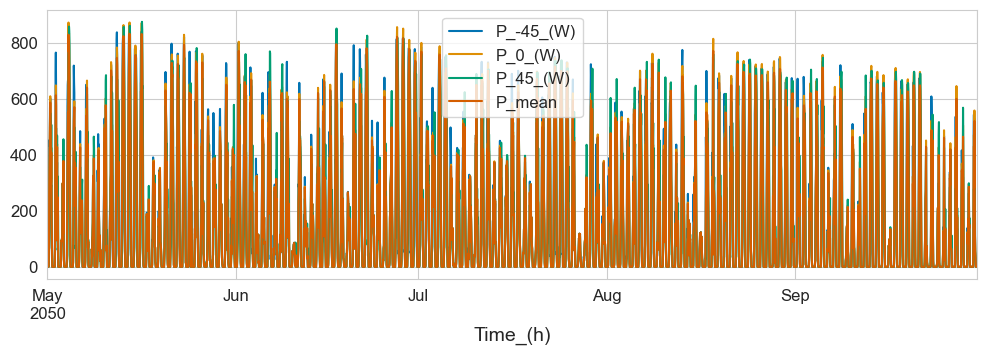

In [24]:
## Clip index and replace index with 2050 index from cooling demand data
filt = (pv_outputs_df.index.month >= 5) & (pv_outputs_df.index.month <= 9)
pv_outputs_df = pv_outputs_df[filt]
pv_outputs_df.index = ukpn_lsoa_cooling_demand.index
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df.plot(ax=ax)

In [25]:
target_year = 2050
filt = dfes_dataf.index.isin(ukpn_lsoa_cooling_demand.columns)
total_capacity_installed = dfes_dataf.loc[filt, f'{target_year} (kW)'].sum()
total_pv_generation = pv_outputs_df[
    'P_mean'] * total_capacity_installed / 1000000000 # in GWh
total_pv_generation = total_pv_generation.to_frame()
total_pv_generation.columns = ['PV_output']

In [26]:
total_pv_generation.sum()

PV_output    2022.691197
dtype: float64

## UKPN results for the entire area

In [27]:
scop=14/3.412 #https://www.eia.gov/todayinenergy/detail.php?id=40232
cop = scop*0.875
total_cooling_demand = ukpn_lsoa_cooling_demand.sum(axis=1).to_frame()/1000000/cop # in GWh
total_cooling_demand.columns = ['Electricity_for_cooling_demand']
total_data = pd.concat([total_pv_generation, total_cooling_demand], axis=1)
total_data.head()

,PV_output,Electricity_for_cooling_demand
Time_(h),,
2050-05-01 00:00:00,0.0,0.0
2050-05-01 01:00:00,0.0,0.0
2050-05-01 02:00:00,0.0,0.0
2050-05-01 03:00:00,0.0,0.0
2050-05-01 04:00:00,0.0,0.0


In [28]:
normalised_data = total_data/total_data.max()
total_data.sum()

PV_output                         2022.691197
Electricity_for_cooling_demand    3664.764070
dtype: float64

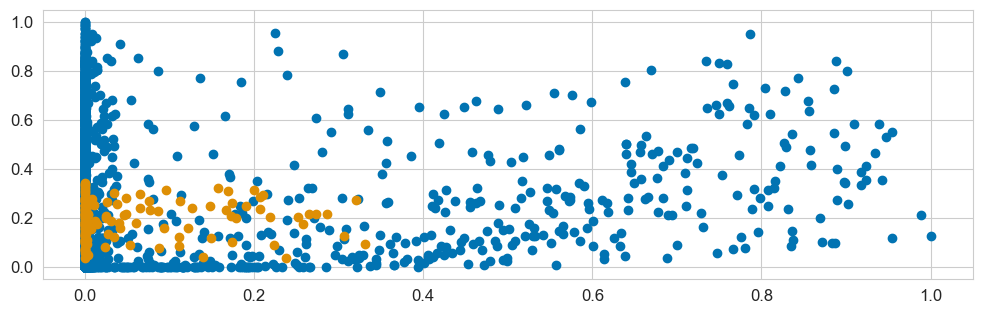

In [29]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x=normalised_data['Electricity_for_cooling_demand'],
           y=normalised_data["PV_output"])
daily_data = normalised_data.resample('1d').mean()
ax.scatter(x=daily_data['Electricity_for_cooling_demand'], y=daily_data["PV_output"])

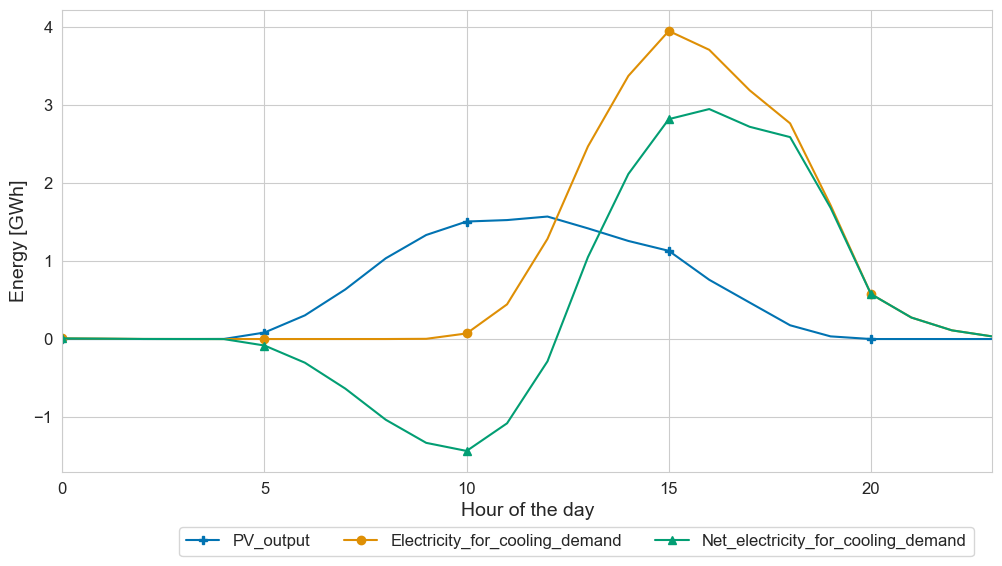

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
average_week_day = total_data.groupby([total_data.index.hour]).mean().reset_index(drop=True)
max_week_day = total_data.groupby([total_data.index.hour]).max().reset_index(drop=True)
min_week_day = total_data.groupby([total_data.index.hour]).min().reset_index(drop=True)

for ii, c in enumerate(average_week_day.columns):
  average_week_day[c].plot(
        ax=ax,
        kind='line',
        marker=markers[ii],    markevery=5)
  # ax.fill_between(average_week_day.index, min_week_day[c],max_week_day[c], color = sns.color_palette()[ii], alpha=0.3)
  
ax.set_ylabel('Energy [GWh]')
ax.set_xlabel('Hour of the day')
ax.margins(0, None)
ax.legend(bbox_to_anchor=(0.98, -0.12), ncol=4, borderaxespad=0.)

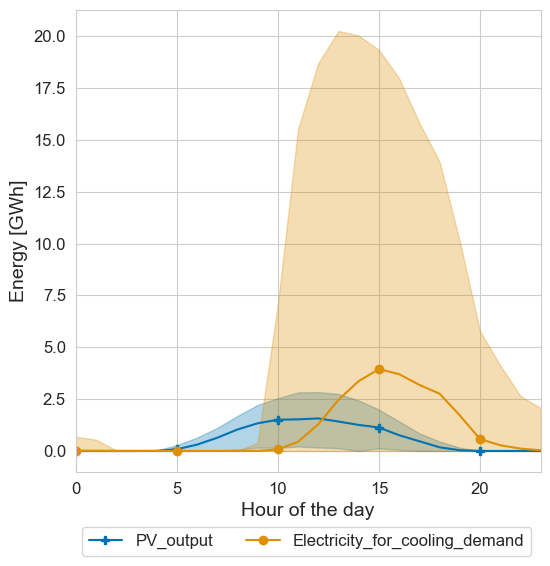

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
average_week_day = total_data.groupby([total_data.index.hour]).mean().reset_index(drop=True)
max_week_day = total_data.groupby([total_data.index.hour]).max().reset_index(drop=True)
min_week_day = total_data.groupby([total_data.index.hour]).min().reset_index(drop=True)

for ii, c in enumerate(average_week_day.columns):
  average_week_day[c].plot(
        ax=ax,
        kind='line',
        marker=markers[ii],    markevery=5)
  ax.fill_between(average_week_day.index, min_week_day[c],max_week_day[c], color = sns.color_palette()[ii], alpha=0.3)
  
ax.set_ylabel('Energy [GWh]')
ax.set_xlabel('Hour of the day')
ax.margins(0, None)
ax.legend(bbox_to_anchor=(0.98, -0.12), ncol=4, borderaxespad=0.)

In [32]:
total_data['Net_electricity_for_cooling_demand'] = total_data['Electricity_for_cooling_demand'] - total_data['PV_output']
average_week_day = total_data.groupby([total_data.index.hour]).mean().reset_index(drop=True)
average_week_day.max()

PV_output                             1.568103
Electricity_for_cooling_demand        3.944412
Net_electricity_for_cooling_demand    2.944306
dtype: float64

In [33]:
## Calculate the net-demand as the difference between the cooling demand and the pv generation
target_year = 2050
frames_net_demand = {}
for lsoa_code in ukpn_lsoa_cooling_demand.columns:
  pv_capacity_installed = dfes_dataf.loc[lsoa_code, f'{target_year} (kW)']
  ic.ic(lsoa_code, pv_capacity_installed)
  pv_generation = pv_outputs_df['P_mean'] * pv_capacity_installed / 1000
  frames_net_demand[lsoa_code] = (ukpn_lsoa_cooling_demand[lsoa_code]/cop -
                                  pv_generation)
net_demand_df = pd.concat(frames_net_demand, axis=1)

ic| lsoa_code: 'E01031338', pv_capacity_installed: 150
ic| lsoa_code: 'E01031339', pv_capacity_installed: 399
ic| lsoa_code: 'E01031340', pv_capacity_installed: 412
ic| lsoa_code: 'E01031341', pv_capacity_installed: 317
ic| lsoa_code: 'E01031342', pv_capacity_installed: 392
ic| lsoa_code: 'E01031343', pv_capacity_installed: 303
ic| lsoa_code: 'E01031344', pv_capacity_installed: 484
ic| lsoa_code: 'E01031345', pv_capacity_installed: 365
ic| lsoa_code: 'E01031346', pv_capacity_installed: 406
ic| lsoa_code: 'E01031347', pv_capacity_installed: 274
ic| lsoa_code: 'E01031348', pv_capacity_installed: 315
ic| lsoa_code: 'E01031349', pv_capacity_installed: 253
ic| lsoa_code: 'E01031350', pv_capacity_installed: 340
ic| lsoa_code: 'E01031351', pv_capacity_installed: 715
ic| lsoa_code: 'E01031352', pv_capacity_installed: 192
ic| lsoa_code: 'E01031353', pv_capacity_installed: 509
ic| lsoa_code: 'E01031354', pv_capacity_installed: 133
ic| lsoa_code: 'E01031355', pv_capacity_installed: 390
ic| lsoa_c

In [34]:
max_headroom = ukpn_lsoa_cooling_demand.max()/cop/1000
max_headroom = max_headroom.reset_index()
max_headroom.columns = ["LSOA", "Peak demand (GW)"]
max_headroom['Name'] = "Max - Electricity for cooling demand"

q95_headroom = ukpn_lsoa_cooling_demand.quantile(0.95)/cop/1000
q95_headroom = q95_headroom.reset_index()
q95_headroom.columns = ["LSOA", "Peak demand (GW)"]
q95_headroom['Name'] = "95% percentiles -Electricity for cooling demand"
q95_headroom.head()

,LSOA,Peak demand (GW),Name
0,E01031338,0.646443,95% percentiles -Electricity for cooling demand
1,E01031339,0.577192,95% percentiles -Electricity for cooling demand
2,E01031340,0.897226,95% percentiles -Electricity for cooling demand
3,E01031341,0.664756,95% percentiles -Electricity for cooling demand
4,E01031342,0.940360,95% percentiles -Electricity for cooling demand


In [35]:
net_max_headroom = (net_demand_df.max()/1000).reset_index()
net_max_headroom.columns = ["LSOA", "Peak demand (GW)"]
net_max_headroom['Name'] = "Max - Net electricity for cooling demand"

net_q95_headroom = (net_demand_df.quantile(0.95)/1000).reset_index()
net_q95_headroom.columns = ["LSOA", "Peak demand (GW)"]
net_q95_headroom['Name'] = "95% percentiles - Net electricity for cooling demand"

additional_headroom = pd.concat([max_headroom, q95_headroom, net_max_headroom, net_q95_headroom])

Text(0.5, 0, 'Additional headroom (GW)')

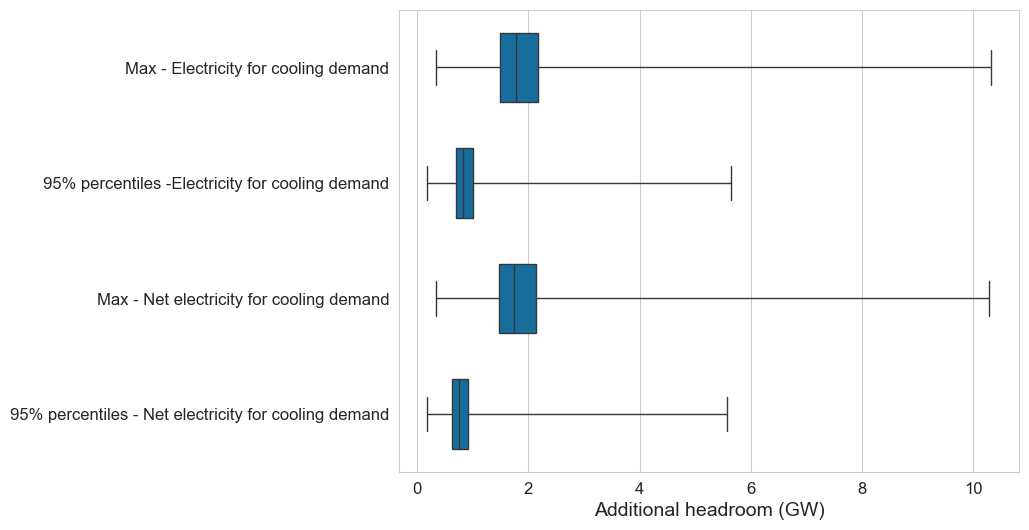

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    additional_headroom, x="Peak demand (GW)",  y='Name',
    whis=[0, 100], width=.6
)
ax.set_ylabel('')
ax.set_xlabel('Additional headroom (GW)')

In [37]:
pd.pivot_table(additional_headroom, values='Peak demand (GW)', columns='Name', index='LSOA').describe()

Name,95% percentiles - Net electricity for cooling demand,95% percentiles -Electricity for cooling demand,Max - Electricity for cooling demand,Max - Net electricity for cooling demand
count,10639.000000,10639.000000,10639.000000,10639.000000
mean,0.810824,0.878188,1.903425,1.869201
std,0.265361,0.279755,0.618970,0.610240
min,0.184355,0.184705,0.341182,0.340433
25%,0.635220,0.693589,1.498493,1.469571
50%,0.756226,0.822456,1.784885,1.751050
75%,0.924824,0.998021,2.175136,2.136329
max,5.569082,5.634768,10.314879,10.286436


In [38]:
(1.869201-1.903425)/1.903425	

-0.017980219866819042

In [39]:
(0.916503-0.984280)/0.984280

-0.06885947088226936

In [40]:
net_demand_df = net_demand_df.max().reset_index()
net_demand_df.columns = ["LSOA", "Peak demand (MW)"]
net_demand_df['Name'] = "Cooling demand\nminus PV generation"

<Axes: xlabel='Name', ylabel='Peak demand (MW)'>

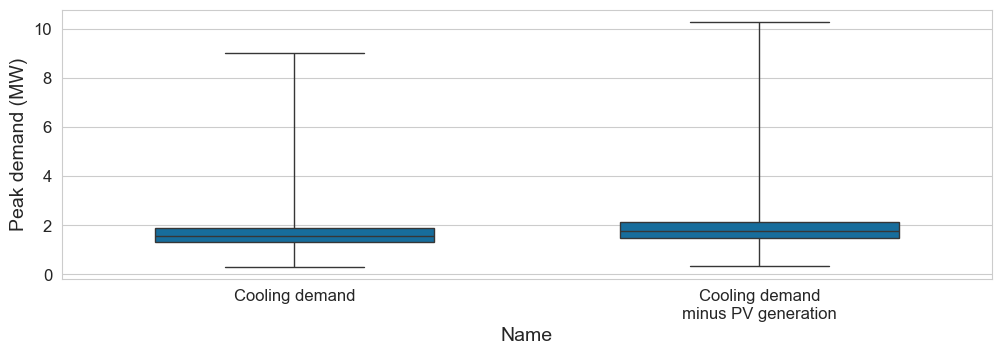

In [41]:
fig, ax = plt.subplots(figsize=figsize)
peak_demand = ukpn_lsoa_cooling_demand.max()/scop
peak_demand = peak_demand.reset_index()
peak_demand.columns = ["LSOA", "Peak demand (MW)"]
peak_demand['Name'] = "Cooling demand"
peak_demand = pd.concat([peak_demand, net_demand_df])
peak_demand["Peak demand (MW)"] = peak_demand["Peak demand (MW)"]/1000
# # Plot the orbital period with horizontal boxes
sns.boxplot(
    peak_demand, x='Name',  y="Peak demand (MW)",
    whis=[0, 100], width=.6, 
)

# # Add in points to show each observation
# sns.stripplot(planets, x="distance", y="method", size=4, color=".3")

In [42]:
net_demand_df.head()

,LSOA,Peak demand (MW),Name
0,E01031338,1433.709828,Cooling demand\nminus PV generation
1,E01031339,1228.056080,Cooling demand\nminus PV generation
2,E01031340,1980.865349,Cooling demand\nminus PV generation
3,E01031341,1332.257241,Cooling demand\nminus PV generation
4,E01031342,1946.357996,Cooling demand\nminus PV generation


In [43]:
lsoa_code

'E01032610'

In [44]:
def plot_map(map_df,
             target,
             ax,
             vmin=None,
             vmax=None,
             cmap=None,
             legend=False, label_legend:str=''):

  # map_df = map_df.dropna(subset=[target])
  # create figure and axes for Matplotlib
  if vmin is None:
    if map_df[target].min() < 0:
      vmin = map_df[target].min()
    else:
      vmin = 0
  if vmax is None:
    vmax = map_df[target].max()

  if cmap == None:
    cmap = 'Blues'

  ax.axis('off')
  ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

  map_df = map_df.to_crs(epsg=3395)  # mercator projections

  if legend:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)
    map = map_df.plot(column=target,
                      cmap=cmap,
                      linewidth=0.01,
                      ax=ax,
                      edgecolor='black',
                      vmin=vmin,
                      vmax=vmax,
                      legend=legend,
                      legend_kwds={
                          "label": label_legend,
                          "orientation": "horizontal"
                      },
                      cax=cax)
  else:
    map = map_df.plot(column=target,
                      cmap=cmap,
                      linewidth=0.01,
                      ax=ax,
                      edgecolor='black',
                      vmin=vmin,
                      vmax=vmax)
  plt.close()
  return map


In [45]:
map_df = viz_functions.get_UK_LSOA_map()
filt = map_df['GeographyCode'].isin(dfes_dataf.index)
map_df.head()

DriverError: C:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\00 - Final data\maps\UK_2011_Census_boundaries_LSOA_fixed.geojson: No such file or directory

#### PV capacity installed at LSOA level

In [ ]:
target_year = 2050
pv_installed_capacity_2050 = dfes_dataf.loc[:, f'{target_year} (kW)'].to_frame()
pv_installed_capacity_2050.columns = ["PV capacity installed (kW)"]
pv_installed_capacity_2050.head()

,PV capacity installed (kW)
LSOA11CD,
E01000001,4
E01000002,49
E01000003,1
E01000005,5
E01000006,87


In [ ]:
pv_installed_capacity_2050.sum()/1000000

PV capacity installed (kW)    3.403939
dtype: float64

In [ ]:
map_df = pd.merge(map_df, pv_installed_capacity_2050, left_on='GeographyCode', right_index=True)

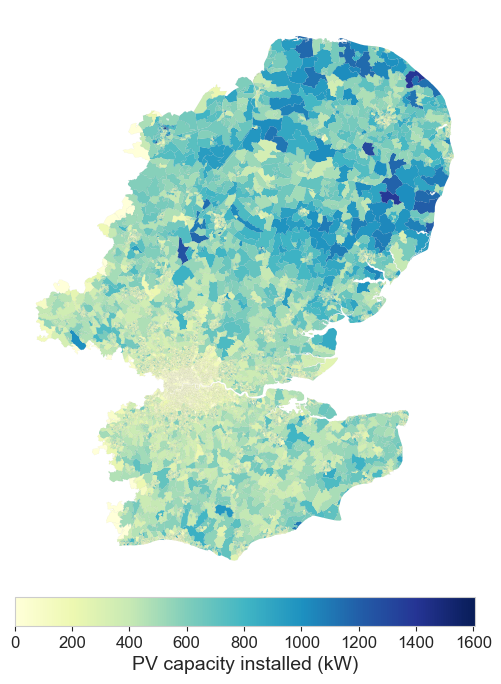

In [ ]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = "YlGnBu"
target = "PV capacity installed (kW)"
plot_map(map_df, target, ax, cmap=cmap_1, legend=True, label_legend="PV capacity installed (kW)")
# ax.set_title('Headroom demand in 2050 excl. cooling demand')
fig

#### Cooling demand at LSOA level

In [ ]:
cooling_demand = ukpn_lsoa_cooling_demand.sum().to_frame()/1000000/cop
cooling_demand.columns = ['Electricity for cooling (GWh)']

In [ ]:
filt = map_df['GeographyCode'].isin(cooling_demand.index)
map_df = map_df[filt]
map_df = pd.merge(map_df, cooling_demand, left_on='GeographyCode', right_index=True)

In [ ]:
cooling_demand.sum()

Electricity for cooling (GWh)    3664.76407
dtype: float64

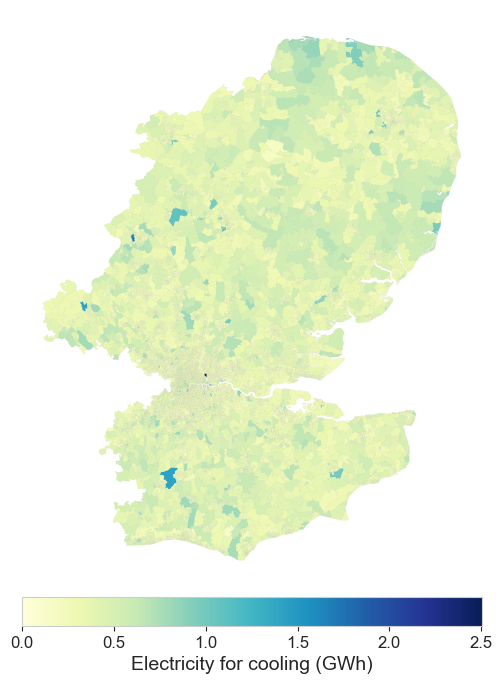

In [ ]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = "YlGnBu"
target = 'Electricity for cooling (GWh)'
plot_map(map_df, target, ax, cmap=cmap_1, legend=True, label_legend='Electricity for cooling (GWh)')
# ax.set_title('Headroom demand in 2050 excl. cooling demand')
fig